In [0]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [0]:
!git clone https://github.com/jorditorresBCN/Deep-Learning-Introduccion-practica-con-Keras.git

Cloning into 'Deep-Learning-Introduccion-practica-con-Keras'...
remote: Enumerating objects: 23, done.
remote: Total 23 (delta 0), reused 0 (delta 0), pack-reused 23
Unpacking objects: 100% (23/23), done.


In [0]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

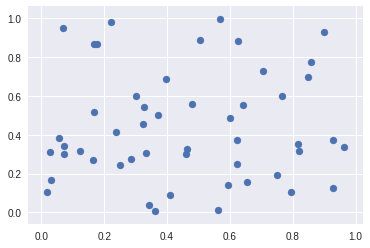

In [0]:
# Prueba de que todo funciona
N=50
x = np.random.rand(N)
y = np.random.rand(N)
plt.scatter(x,y)
plt.show()

In [0]:
## PRIMERA PARTE: PRUEBA MNIST
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

3


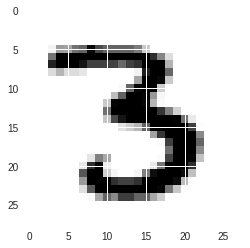

In [0]:
plt.imshow(x_train[12], cmap=plt.cm.binary)
print(y_train[12])

In [0]:
# cogemos las dimensiones
print(x_train.ndim,"----", x_train.shape, "------", x_train.dtype)

3 ---- (60000, 28, 28) ------ uint8


In [0]:
# normalizamos dividiendo por 255 y aplanando en un vector
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/=255
x_test/=255
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1]*x_test.shape[2])
print(x_train.shape, x_test.shape)

(60000, 784) (10000, 784)


In [0]:
# aplicamos one-hot encoding a los labels
from keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print(y_train.shape, y_test.shape)


(60000, 10) (10000, 10)


In [0]:
# creamos un modelo básico de NN en keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
model = Sequential()
model.add(Dense(10,activation="relu",input_shape=(784,)))
model.add(Dense(10,activation="softmax"))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


In [0]:
# tras crear el modelo y añadirle las capas, hay que compilarlo
model.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

In [0]:
# tras compilar el modelo hay que entrenarlo
model.fit(x_train, y_train, batch_size=100, epochs = 5)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/step - loss: 1.4239 - acc: 0.5749
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.6925 - acc: 0.8159
Epoch 3/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.5210 - acc: 0.8549
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.4510 - acc: 0.8746
Epoch 5/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.4117 - acc: 0.8849


In [0]:
# tras entrenarlo lo evaluamos con los datos de prueba
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss: ", test_loss, " Accuracy: ", test_acc)

10000/10000 [==============================] - 0s 47us/step
Loss:  0.3791528316617012  Accuracy:  0.892


In [0]:
# para hacer predicciones seleccionamos un ejemplo del test al azar
#plt.imshow(x_test[11], cmap=plt.cm.binary)
predictions = model.predict(x_test)

In [0]:
print(predictions[11])
# esto corresponde a las predicciones de cada una de las categorias.
# Para que nos devuelva el índice de la categoria usaremos:
print(np.argmax(predictions[11]))

[2.8131597e-02 4.5555478e-04 2.3716798e-01 7.7383067e-03 1.0635266e-02
 5.9740108e-02 4.7954151e-01 3.8668833e-04 1.7541814e-01 7.8483968e-04]
6


In [0]:
## REDES NEURALES CONVOLUCIONALES
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(5,5),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                10250     
Total params: 62,346
Trainable params: 62,346
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Entrenamiento y evaluación del modelo
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [0]:
print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


In [0]:
train_images = train_images.reshape((60000,28,28,1))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
#model.fit(train_images, train_labels, batch_size=100, epochs=5)
model.fit(train_images, train_labels, validation_split=0.1, batch_size=100, epochs=5)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test Accuracy: ', test_acc)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 85us/step - loss: 0.9000 - acc: 0.7706 - val_loss: 0.2776 - val_acc: 0.9185
Epoch 2/5
54000/54000 [==============================] - 4s 81us/step - loss: 0.2788 - acc: 0.9182 - val_loss: 0.1843 - val_acc: 0.9492
Epoch 3/5
54000/54000 [==============================] - 4s 81us/step - loss: 0.2042 - acc: 0.9396 - val_loss: 0.1510 - val_acc: 0.9558
Epoch 4/5
54000/54000 [==============================] - 4s 81us/step - loss: 0.1642 - acc: 0.9522 - val_loss: 0.1177 - val_acc: 0.9677
Epoch 5/5
10000/10000 [==============================] - 1s 71us/step
Test Accuracy:  0.9683


In [0]:
# invocar modelos preentrenados
from keras.applications import VGG16, Xception,InceptionV3

In [0]:
model = VGG16(weights = 'imagenet')

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
model.layers.pop()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
# CAMBIAR TAMAÑO DE NUMPY ARRAYS
import cv2
import numpy as np
x_train_rs = np.zeros(shape=(1000, 224,224))

#img = cv2.imread('your_image.jpg')
for img in range(1000):
  x_train_rs[img] = cv2.resize(x_train[img], dsize=(224,224), interpolation=cv2.INTER_CUBIC)

In [0]:
print(x_train.shape, x_train_rs.shape)
type(x_train_rs)


(60000, 28, 28) (1000, 224, 224)


numpy.ndarray

In [0]:
y_train_rs = y_train[0:1000]
print(y_train_rs.shape)

(1000,)


3


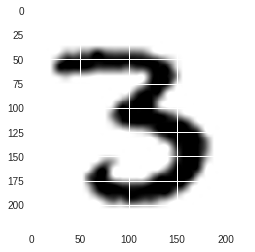

In [0]:
plt.imshow(x_train_rs[12], cmap=plt.cm.binary)
print(y_train_rs[12])

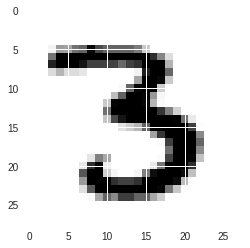

In [0]:
plt.imshow(x_train[12], cmap=plt.cm.binary)

In [0]:
x_train_rs2 = np.empty((1000,224,224,3))
#x_train_rs2 = x_train_rs[:, :,:, np.newaxis]
print(x_train_rs2.shape)

x_train_rs2[:,:,:,0] = x_train_rs

for r in range(1,3):
  print(r)
  x_train_rs2[:,:,:,r] = x_train_rs2[:,:,:,0]

print(x_train_rs2.shape)

(1000, 224, 224, 3)
1
2
(1000, 224, 224, 3)


In [0]:
x_train_rs2[1,1,1,1] == x_train_rs2[1,1,1,2] #verificamos que son los mismos datos

True

In [0]:
from keras.utils import to_categorical
x_train_rs2 = x_train_rs2.astype('float32')/255
y_train = to_categorical(y_train)

model.compile(loss = 'categorical_crossentropy', optimizer='sgd', metrics = ['accuracy'])
model.fit(x_train_rs2, y_train, validation_split=0.1, batch_size=100, epochs=5)

test_loss, test_acc = model.evaluate(x_train_rs2, y_train)
print('Test Accuracy in Training set: ', test_acc)

ValueError: ignored

In [0]:
train_images.shape

(60000, 28, 28, 1)

TypeError: ignored

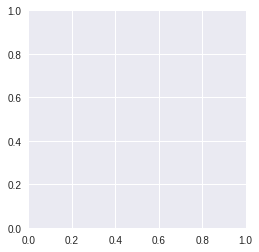

In [0]:
plt.imshow(train_images[2])

In [0]:
from keras.applications.vgg16 import VGG16
from keras.models import Model
from keras.layers import Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization

#load vgg16 without dense layer and with theano dim ordering
base_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (224,224,3))

#number of classes in your dataset e.g. 20
num_classes = 10



ValueError: ignored

In [0]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [0]:
x = Flatten()(base_model.output)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = BatchNormalization()(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

#create graph of your new model
head_model = Model(input = base_model.input, output = predictions)

#compile the model
head_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

head_model.summary()



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


In [0]:

#train your model on data
head_model.fit(x_train_rs2, y_train, batch_size = 30, epochs = 2, verbose = 1)

Epoch 1/2
1000/1000 [==============================] - 37s 37ms/step - loss: 2.3417 - acc: 0.1140
Epoch 2/2
1000/1000 [==============================] - 30s 30ms/step - loss: 2.3266 - acc: 0.1050


In [0]:
train_loss, train_acc = head_model.evaluate(x_train_rs2, y_train)
print('Test Accuracy in Training set: ', train_acc)

1000/1000 [==============================] - 13s 13ms/step
Test Accuracy in Training set:  0.097


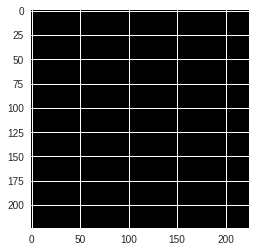

In [0]:
plt.imshow(x_train_rs2[3])